In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '16'
plt.rcParams['figure.dpi'] = 125
plt.rcParams['figure.facecolor'] = 'white'

import numpy as np
from obspy import read

import xarray as xr

import os
import sys  
module_path = os.path.abspath(os.path.join('/Users/gilaverbuch/dev/SignalProcessing/pyoad'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.pyoad.pyoad import read_data, save2mseed


In [2]:
records_range = np.arange(0,3,1)

file_name = '/Users/gilaverbuch/dev/pyOAD/Results/shru905/05140537.D21'
header_df_905, waveforms_905 = read_data(file_name, records_range)

file_name = '/Users/gilaverbuch/dev/pyOAD/Results/shru910/10082358.D17'
header_df_910, waveforms_910 = read_data(file_name, records_range)

file_name = '/Users/gilaverbuch/dev/pyOAD/Results/shru917/10100242.D17'
header_df_917, waveforms_917 = read_data(file_name, records_range)


Reading waveforms - shru 905


100%|█████████████████████████████████████████████| 3/3 [00:05<00:00,  1.80s/it]


Reading waveforms - shru 910


100%|█████████████████████████████████████████████| 3/3 [00:04<00:00,  1.49s/it]


Reading waveforms - shru 917


100%|█████████████████████████████████████████████| 3/3 [00:04<00:00,  1.52s/it]


In [3]:
header_df_905

,0
shru_num,905
channels,4
npts,1048576
reclen,12583936
sampling_rate,19531.25
delta,0.000051
starttime,2021-05-14T05:37:58.850125Z
endtime,2021-05-14T05:38:52.537216Z
internal_temp,11.4
bat_voltage,13.7


In [4]:
waveforms_905

12 Trace(s) in Stream:
SR905.CHN01..FDH | 2021-05-14T05:37:58.850125Z - 2021-05-14T05:38:52.537165Z | 19531.2 Hz, 1048576 samples
SR905.CHN02..FDH | 2021-05-14T05:37:58.850125Z - 2021-05-14T05:38:52.537165Z | 19531.2 Hz, 1048576 samples
SR905.CHN03..FDH | 2021-05-14T05:37:58.850125Z - 2021-05-14T05:38:52.537165Z | 19531.2 Hz, 1048576 samples
SR905.CHN04..FDH | 2021-05-14T05:37:58.850125Z - 2021-05-14T05:38:52.537165Z | 19531.2 Hz, 1048576 samples
SR905.CHN01..FDH | 2021-05-14T05:38:52.537216Z - 2021-05-14T05:39:46.224256Z | 19531.2 Hz, 1048576 samples
SR905.CHN02..FDH | 2021-05-14T05:38:52.537216Z - 2021-05-14T05:39:46.224256Z | 19531.2 Hz, 1048576 samples
SR905.CHN03..FDH | 2021-05-14T05:38:52.537216Z - 2021-05-14T05:39:46.224256Z | 19531.2 Hz, 1048576 samples
SR905.CHN04..FDH | 2021-05-14T05:38:52.537216Z - 2021-05-14T05:39:46.224256Z | 19531.2 Hz, 1048576 samples
SR905.CHN01..FDH | 2021-05-14T05:39:46.224307Z - 2021-05-14T05:40:39.911347Z | 19531.2 Hz, 1048576 samples
SR905.CHN02..F

In [5]:
waveforms_905.merge()

4 Trace(s) in Stream:
SR905.CHN01..FDH | 2021-05-14T05:37:58.850125Z - 2021-05-14T05:40:39.911347Z | 19531.2 Hz, 3145728 samples
SR905.CHN02..FDH | 2021-05-14T05:37:58.850125Z - 2021-05-14T05:40:39.911347Z | 19531.2 Hz, 3145728 samples
SR905.CHN03..FDH | 2021-05-14T05:37:58.850125Z - 2021-05-14T05:40:39.911347Z | 19531.2 Hz, 3145728 samples
SR905.CHN04..FDH | 2021-05-14T05:37:58.850125Z - 2021-05-14T05:40:39.911347Z | 19531.2 Hz, 3145728 samples

In [6]:
waveforms_905[0].stats

         network: SR905
         station: CHN01
        location: 
         channel: FDH
       starttime: 2021-05-14T05:37:58.850125Z
         endtime: 2021-05-14T05:40:39.911347Z
   sampling_rate: 19531.25
           delta: 5.12e-05
            npts: 3145728
           calib: 1
      processing: ["ObsPy 1.3.0: detrend(options={}::type='demean')"]
           units: Pa

/Users/gilaverbuch/opt/miniconda3/envs/pyoad/lib/python3.10/site-packages/obspy/imaging/util.py:266: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small')
/Users/gilaverbuch/opt/miniconda3/envs/pyoad/lib/python3.10/site-packages/obspy/imaging/waveform.py:805: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small',


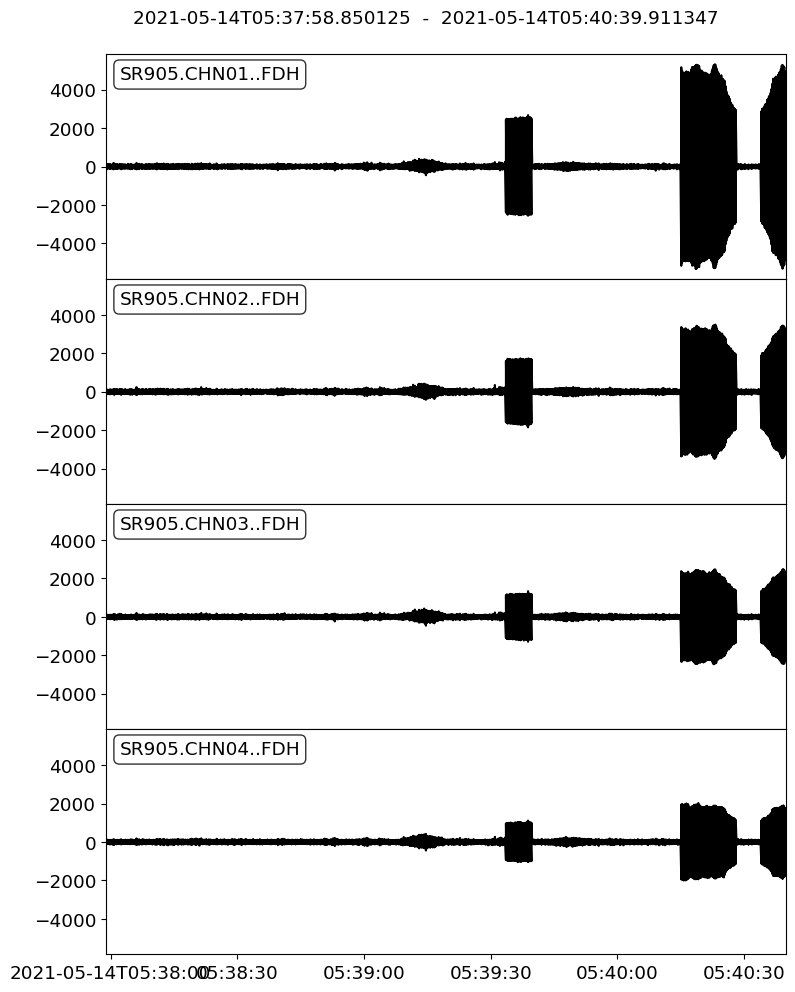

In [7]:
waveforms_905.plot();

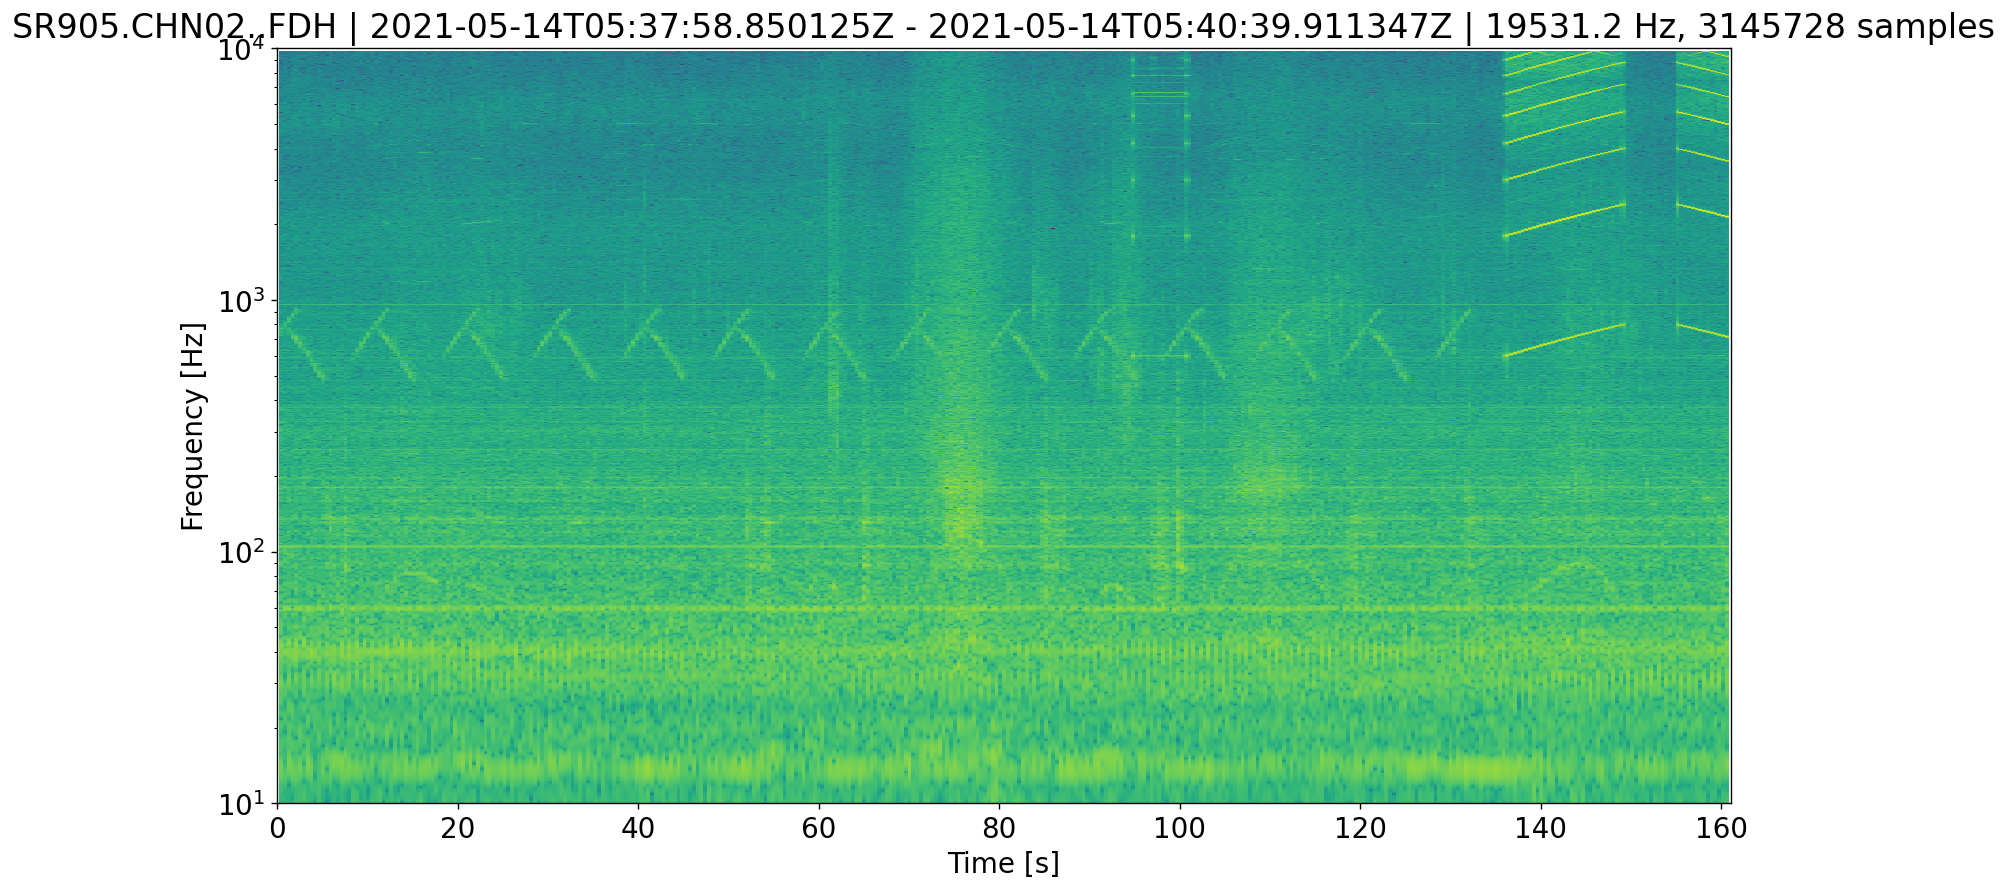

In [8]:
fig = waveforms_905[1].spectrogram(wlen=1, per_lap=0.5, log=True, dbscale=True, show=False);
fig.set_figheight(8)
fig.set_figwidth(15)
plt.ylim(1e1, 1e4)
plt.show()

/Users/gilaverbuch/opt/miniconda3/envs/pyoad/lib/python3.10/site-packages/obspy/imaging/util.py:266: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small')
/Users/gilaverbuch/opt/miniconda3/envs/pyoad/lib/python3.10/site-packages/obspy/imaging/waveform.py:805: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small',


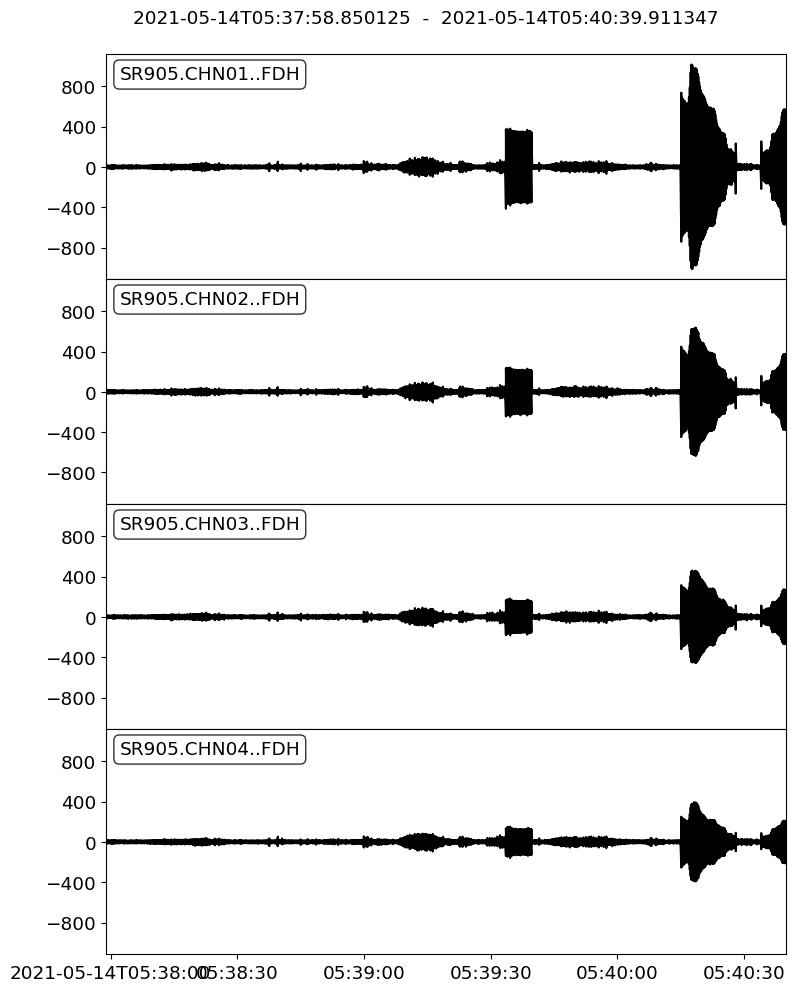

In [9]:
waveforms_905.filter('bandpass', freqmin=1e3, freqmax=2e3, corners=4, zerophase=False)
waveforms_905.plot();

In [10]:
waveforms_905.decimate(2)

4 Trace(s) in Stream:
SR905.CHN01..FDH | 2021-05-14T05:37:58.850125Z - 2021-05-14T05:40:39.911296Z | 9765.6 Hz, 1572864 samples
SR905.CHN02..FDH | 2021-05-14T05:37:58.850125Z - 2021-05-14T05:40:39.911296Z | 9765.6 Hz, 1572864 samples
SR905.CHN03..FDH | 2021-05-14T05:37:58.850125Z - 2021-05-14T05:40:39.911296Z | 9765.6 Hz, 1572864 samples
SR905.CHN04..FDH | 2021-05-14T05:37:58.850125Z - 2021-05-14T05:40:39.911296Z | 9765.6 Hz, 1572864 samples

In [ ]:
# Save to miniSEED - Standard for the Exchange of Earthquake Data (SEED)
# Year/shru_number/channel/data_file
save2mseed(waveforms_905)

In [ ]:
tr = read('Results/2021/SR905/')
tr

In [ ]:
waveforms_910.plot();

In [ ]:
waveforms_910.merge()


In [ ]:
waveforms_917.plot();

In [ ]:
waveforms_917.merge()
fig = waveforms_917[1].spectrogram(wlen=1, per_lap=0.5, log=True, dbscale=True, show=False);
fig.set_figheight(8)
fig.set_figwidth(15)
plt.ylim(1e1, 1e4)
# plt.xlim(20,30)
plt.show()

In [ ]:
fig = waveforms_905[3].spectrogram(wlen=1, per_lap=0.5, log=True, dbscale=True, show=False);
fig.set_figheight(8)
fig.set_figwidth(15)
plt.ylim(1e1, 1e4)
# plt.xlim(20,30)
plt.show()

In [ ]:
waveforms_917.plot();

In [ ]:
class Data(object):
    def __init__(self, header, stream):
        
        self.header = header
        self.stream = stream
        
        return

In [ ]:
da = xr.Dataset({'psd': ('frequency', day_.power[1])},
            coords={'frequency':day_.power[0]},
            attrs={'trace': day_.path,
                   'date': day_.st[0].stats.starttime.strftime("%Y:%m:%d"), 
                   'network': day_.st[0].stats.network,
                   'station': day_.st[0].stats.station ,
                   'sampling_rate':day_.st[0].stats.sampling_rate,
                   'window_length':day_.time_window,
                   'window_samp':day_.window_samp
                   })

In [ ]:
waves = Data(header_df_910, waveforms_910)

In [ ]:
waveforms2 = waveforms_917.copy()
waveforms2.merge(method=1, interpolation_samples=0)

In [ ]:
fig = waveforms2[0].spectrogram(wlen=1, per_lap=0.5, log=True, dbscale=True, show=False);
fig.set_figheight(8)
fig.set_figwidth(15)
plt.ylim(1e1, 1e4)
# plt.xlim(20,30)
plt.show()

In [ ]:
waveforms_905[0].stats

In [ ]:
test = read('Results/2021/SR905/CHN01/SR905.CHN01..FDH.2021.134.05.37.58')
fig = test[0].spectrogram(wlen=1, per_lap=0.5, log=True, dbscale=True, show=False);
fig.set_figheight(8)
fig.set_figwidth(15)
plt.ylim(1e1, 1e4)
# plt.xlim(20,30)
plt.show()

In [ ]:
test[0].stats

# Data from YT's matlab code

In [ ]:
tr_rec1 = waveforms[0].copy() 
tr_rec2 = waveforms[1].copy()
tr_rec3 = waveforms[2].copy()

tr_ch1_rec2 = waveforms[4].copy()

In [ ]:
samp_freq = 19531.25
dt = 1/samp_freq
time_p = np.arange(0, tr_rec1.stats.npts*dt, dt)

In [ ]:
matlab_channel1_rec1 = np.loadtxt('/Users/gilaverbuch/dev/SHRU_programs/SHRU_24bit/channel1_rec1.scv')
matlab_channel2_rec1 = np.loadtxt('/Users/gilaverbuch/dev/SHRU_programs/SHRU_24bit/channel2_rec1.scv')
matlab_channel3_rec1 = np.loadtxt('/Users/gilaverbuch/dev/SHRU_programs/SHRU_24bit/channel3_rec1.scv')

matlab_channel1_rec2 = np.loadtxt('/Users/gilaverbuch/dev/SHRU_programs/SHRU_24bit/channel1_rec2.scv')

# Header = read_header()

In [ ]:
len(matlab_channel1_rec1), len(tr_rec1.data)

In [ ]:
samp_freq = 19531.25
dt = 1/samp_freq
time_m = np.arange(0, len(matlab_channel1_rec2)*dt, dt)


plt.figure(figsize = (15,5))
plt.plot(time_m, matlab_channel1_rec2, 'r')
plt.plot(time_p, tr_ch1_rec2.data, 'g')

# plt.plot(time_m, matlab_channel1_rec1, 'r')
# plt.plot(time_p, tr_rec1.data, 'g')
plt.xlim(20,20.1)
plt.ylim(-2e5, 2e5)
plt.show()

In [ ]:
(2.5/(2**23)/20)

In [ ]:
sensitivity/3.1623e+08

In [ ]:
(2.8**2 + 1.2**2)**0.5

In [ ]:

f, t, Sxx = signal.spectrogram(matlab_channel, samp_freq, nperseg=int(samp_freq), noverlap=int(samp_freq//2))
plt.figure(figsize=(10,5))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.xlim(10,20)
plt.ylim(0,200)
plt.clim(0,1e-9)
plt.colorbar()
plt.title('from matlab')
plt.show()

In [ ]:
samp_freq = 19531.25
dt = 1/samp_freq
time_m = np.arange(0, len(matlab_channel)*dt, dt)

plt.figure(figsize = (15,5))
plt.plot(time_m, matlab_channel*1e-4, 'r')

plt.show()

In [ ]:
samp_freq = 19531.25
dt = 1/samp_freq
time_p = np.arange(0, len(channel1)*dt, dt)

plt.figure(figsize = (15,5))
plt.plot(time_p, channel1, 'g')
# plt.plot(time_p, channel2*2.5e2, 'r')
# plt.xlim(5.8,6)
plt.show()

In [ ]:
channel1 = np.asarray(channel1, dtype=np.float32)

In [ ]:
len(matlab_channel) / len(channel1)

In [ ]:
start = time.time()

channel1 = get_data(x, pos, l)

end  = time.time()
print ("Time elapsed:", end - start)

In [ ]:
pos = 1024
l = (len(x[1024:])//128)
npts = 1048576

l1 = l*0
l2 = l1+l
def get_data(x, pos, l):
    
    data=[]
    for loc in range(l1+pos,l2, 12):
    
        d = bytearray(x[loc:loc+3])
        d.append(0)
        dpoint = int.from_bytes(d, byteorder='big', signed=True) * (2.5/(2**23)/20)
        data.append(dpoint)
    
    return data
    
    

In [ ]:
xs = bytearray(b'\x00\x1b\xcf')
xs.append(0)
print(xs)
struct.unpack('>i', b'\x00\x1b\xcf\x00')[0], int.from_bytes(xs, byteorder='big', signed=True)